Este projeto é uma continuação do trabalho de Data Cleaning que realizei anteriormente. A principal finalidade deste novo projeto é criar visualizações que nos permitirão analisar as questões que surgirem. Inicialmente, identifiquei oito perguntas que buscarei responder.

1. Existe uma correlação entre a duração de um anime (número de episódios) e sua avaliação?

1 - Bom para a Primeira pergunta avaliaremos com o coeficiente de correlação de Pearson

In [33]:
# Primeiro importaremos as libs que serão utilizadas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
# Agora importaremos o Dataset após o processo de Data Cleaning

df = pd.read_csv("mal_cleaned.csv", sep=";")
df.head()

,Unnamed: 0,Title,Episode Count,Airing Status,Theme,Demographic Target,Genres,"Type (e.g., TV Show, Movie)",Favorites Count,Popularity Rank,Overall Rank,Average User Score,Members Count,Synopsis,Duration per Episode,Premiered Season,Production Studio,Start of Transmission,End of Transmission,Premiered Year
0,0,Fullmetal Alchemist: Brotherhood,64,Finished Airing,Military,Shounen,"Action,Adventure,Drama,Fantasy,",TV,218277,3,1,9.10,3190961,After a horrific alchemy experiment goes wrong...,24 min. per ep.,Spring,Bones,"Apr 5, 2009","Jul 4, 2010",2009.0
1,1,Steins;Gate,24,Finished Airing,Unknown,Unknown,"Drama,Sci-Fi,Suspense,",TV,183596,13,2,9.07,2452142,Eccentric scientist Rintarou Okabe has a never...,24 min. per ep.,Spring,White Fox,"Apr 6, 2011","Sep 14, 2011",2011.0
2,2,Bleach: Sennen Kessen-hen,13,Finished Airing,Unknown,Shounen,"Action,Adventure,Fantasy,",TV,18421,458,3,9.06,455428,Substitute Soul Reaper Ichigo Kurosaki spends ...,24 min. per ep.,Fall,Pierrot,"Oct 11, 2022","Dec 27, 2022",2022.0
3,3,Gintama°,51,Finished Airing,Unknown,Shounen,"Action,Comedy,Sci-Fi,",TV,16042,332,4,9.06,599235,"Gintoki, Shinpachi, and Kagura return as the f...",24 min. per ep.,Spring,Bandai Namco Pictures,"Apr 8, 2015","Mar 30, 2016",2015.0
4,4,Kaguya-sama wa Kokurasetai: Ultra Romantic,13,Finished Airing,School,Seinen,"Comedy,Romance,",TV,29397,193,5,9.05,832346,The elite members of Shuchiin Academy's studen...,23 min. per ep.,Spring,A-1 Pictures,"Apr 9, 2022","Jun 25, 2022",2022.0


In [35]:
# Vamos criar duas variáveis do tipo Series e atribuir a coluna que usaremos para realizar o cálculo de correlação de Pearson

series1 = df["Episode Count"]
series2 = df["Overall Rank"]

In [36]:
resultado = df.loc[df['Production Studio'] == 'K-Factory']
resultado#['Average User Score'].mean()

,Unnamed: 0,Title,Episode Count,Airing Status,Theme,Demographic Target,Genres,"Type (e.g., TV Show, Movie)",Favorites Count,Popularity Rank,Overall Rank,Average User Score,Members Count,Synopsis,Duration per Episode,Premiered Season,Production Studio,Start of Transmission,End of Transmission,Premiered Year
436,436,Ginga Eiyuu Densetsu Gaiden,24,Finished Airing,Unknown,Unknown,"Action,Drama,Sci-Fi,",OVA,66,4322,437,8.12,23248,Ginga Eiyuu Densetsu Gaiden is the first of tw...,26 min. per ep.,Unknown,K-Factory,"Feb 9, 1998","Sep 26, 1998",NaN
533,533,Ginga Eiyuu Densetsu Gaiden (1999),28,Finished Airing,Unknown,Unknown,"Action,Drama,Sci-Fi,",OVA,25,4659,534,8.05,19551,Ginga Eiyuu Densetsu Gaiden (1999) is the seco...,26 min. per ep.,Unknown,K-Factory,"Dec 24, 1999","Jul 21, 2000",NaN


In [37]:
# Agora faremos o cálculo
corr = np.corrcoef(series1,series2)
print(corr[0][1])

0.12079546602041155


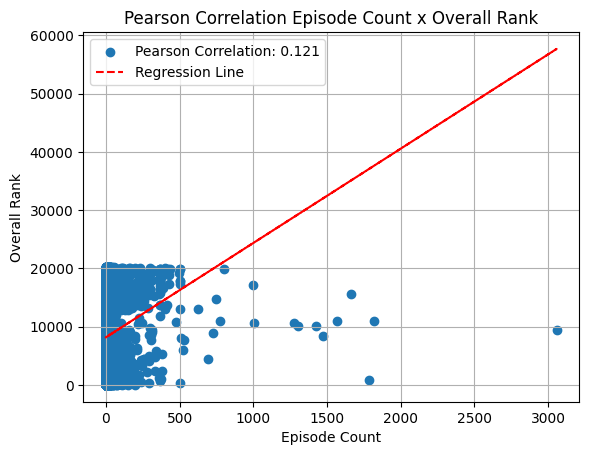

In [38]:
# Criando gráfico de dispersão
plt.scatter(series1,series2,label= f'Pearson Correlation: {corr[0][1]:.3f}')

# Calculando a Regressão linear
m, b = np.polyfit(series1, series2, 1)

# Plotando a linha de regressão linear no gráfico de dispersão
plt.plot(series1, m * np.array(series1) + b, color='red', linestyle='--', label='Regression Line')

# Labels e Títulos
plt.xlabel('Episode Count')
plt.ylabel('Overall Rank')
plt.title('Pearson Correlation Episode Count x Overall Rank')

# Legenda
plt.legend()

# Mostrar o gráfico
plt.grid()
plt.show()

Como mostrado no gráfico acima não temos uma forte correlação entre a quantidade de episódios "Episode Count" e o rank geral "Overall Rank"

Agora iremos para a próxima pergunta que tentaremos responder
Quais estúdios têm um histórico consistente de produção de animes populares ou de alta audiência? Existem características ou estratégias específicas que destacam esses estúdios?

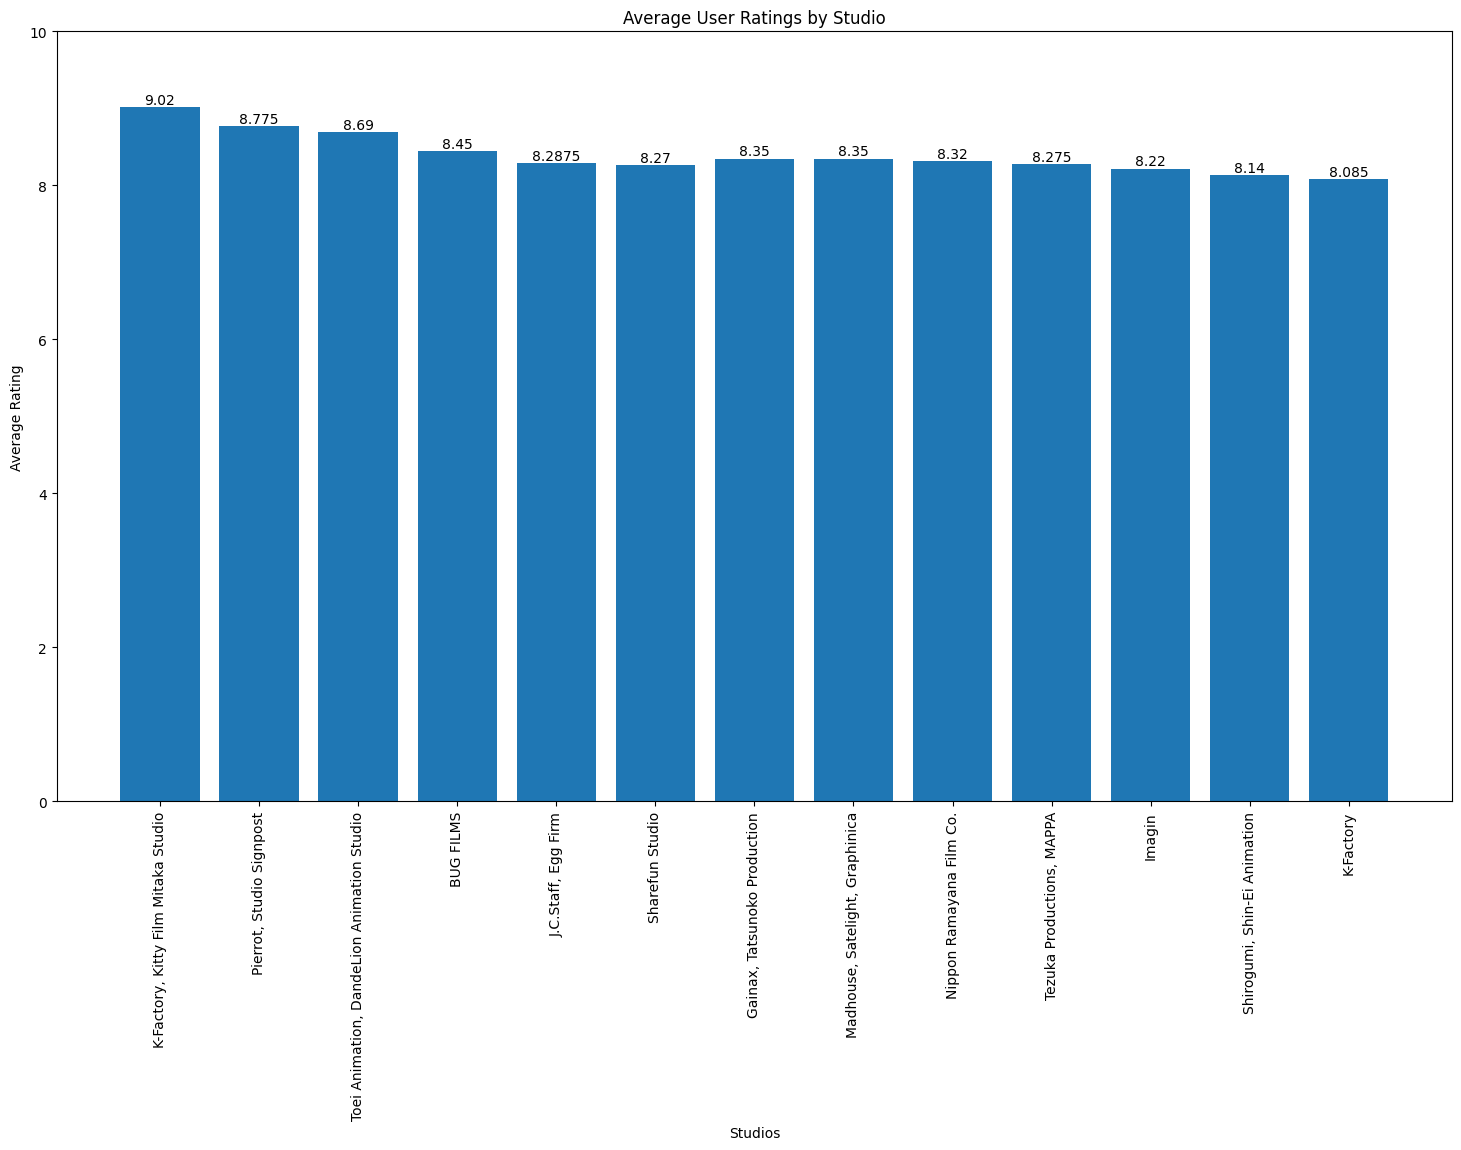

In [39]:

studio_valido = []
studios_com_notas_maiores_que_7 = []
studios_unicos = df['Production Studio'].unique()
for studio in studios_unicos:
    studio_records = df[df['Production Studio'] == studio]
    all_high_ratings = (studio_records['Average User Score'] > 8).all()
    
    if all_high_ratings:
        studio_valido.append(studio)
        media_nota = studio_records['Average User Score'].mean()
        studios_com_notas_maiores_que_7.append((studio, media_nota))

df_2 = pd.DataFrame(studios_com_notas_maiores_que_7)

df_2.columns = ['Production Studio', 'Average Rating']

df['Production Studio'] = df['Production Studio'].str.replace(r',\s+', ', ', regex=True)
df_2['Production Studio'] = df_2['Production Studio'].str.replace(r',\s+', ', ', regex=True)


studios = df_2['Production Studio']
average_ratings = df_2['Average Rating']

# Create a bar chart for average ratings
plt.figure(figsize=(18, 10))
plt.bar(studios, average_ratings)
for i, v in enumerate(average_ratings):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.xlabel('Studios')
plt.ylabel('Average Rating')
plt.title('Average User Ratings by Studio')
plt.ylim(0, 10)

# Show the plot
plt.show()

In [40]:

df_merged = df.merge(df_2,left_on='Production Studio',right_on='Production Studio',how='inner')
#df_merged = df.merge(df_2, left_on='Production Studio', right_on='studio', how='inner')
df_merged
    


,Unnamed: 0,Title,Episode Count,Airing Status,Theme,Demographic Target,Genres,"Type (e.g., TV Show, Movie)",Favorites Count,Popularity Rank,...,Average User Score,Members Count,Synopsis,Duration per Episode,Premiered Season,Production Studio,Start of Transmission,End of Transmission,Premiered Year,Average Rating
0,11,Ginga Eiyuu Densetsu,110,Finished Airing,Unknown,Unknown,"Drama,Sci-Fi,",OVA,15708,732,...,9.02,306705,The 150-year-long stalemate between the two in...,26 min. per ep.,Unknown,"K-Factory, Kitty Film Mitaka Studio","Jan 8, 1988","Mar 17, 1997",NaN,9.0200
1,31,Kingdom 3rd Season,26,Finished Airing,Unknown,Seinen,"Action,",TV,1857,2061,...,8.81,91936,"Following the successful Sanyou campaign, the ...",25 min. per ep.,Spring,"Pierrot, Studio Signpost","Apr 6, 2020","Oct 17, 2021",2020.0,8.7750
2,43,Kingdom 4th Season,26,Finished Airing,Unknown,Seinen,"Action,",TV,947,2800,...,8.74,54251,Following the conclusion of the large-scale co...,24 min. per ep.,Spring,"Pierrot, Studio Signpost","Apr 10, 2022","Oct 2, 2022",2022.0,8.7750
3,58,The First Slam Dunk,1,Finished Airing,Unknown,Shounen,"ning,Sports,",Movie,179,4536,...,8.69,20827,"Shohoku's ""speedster"" and point guard, Ryouta ...",2 hr. 4 min.,Unknown,"Toei Animation, DandeLion Animation Studio","Dec 3, 2022",NaN,NaN,8.6900
4,151,Zom 100: Zombie ni Naru made ni Shitai 100 no ...,12,Currently Airing,Unknown,Seinen,"Action,Comedy,Horror,Supernatural,",TV,756,1371,...,8.45,159426,"In a trash-filled apartment, 24-year-old Akira...",24 min. per ep.,Summer,BUG FILMS,"Jul 9, 2023",?,2023.0,8.4500
5,164,Saiki Kusuo no Ψ-nan,120,Finished Airing,Unknown,Shounen,"Comedy,Supernatural,",TV,27818,135,...,8.42,1043005,"To the average person, psychic abilities might...",5 min. per ep.,Summer,"J.C.Staff, Egg Firm","Jul 4, 2016","Dec 26, 2016",2016.0,8.2875
6,165,Saiki Kusuo no Ψ-nan 2,24,Finished Airing,Unknown,Shounen,"Comedy,Supernatural,",TV,4034,329,...,8.42,608023,The disastrous life of the gifted psychic Kusu...,24 min. per ep.,Winter,"J.C.Staff, Egg Firm","Jan 17, 2018","Jun 27, 2018",2018.0,8.2875
7,341,Saiki Kusuo no Ψ-nan: Kanketsu-hen,1,Finished Airing,Unknown,Shounen,"Comedy,Supernatural,",Special,368,1092,...,8.20,207420,"The ground shakes, a rumble follows, and befor...",47 min.,Unknown,"J.C.Staff, Egg Firm","Dec 28, 2018",NaN,NaN,8.2875
8,447,Saiki Kusuo no Ψ-nan: Ψ-shidou-hen,6,Finished Airing,Unknown,Shounen,"Comedy,Supernatural,",ONA,436,1071,...,8.11,210643,Kusuo Saiki is a high school student who posse...,22 min. per ep.,Unknown,"J.C.Staff, Egg Firm","Dec 30, 2019",NaN,NaN,8.2875
9,204,Wu Liuqi: Xuanwu Guo Pian,10,Finished Airing,Unknown,Unknown,"Action,Adventure,Comedy,Drama,Mystery,",ONA,750,2797,...,8.36,54387,In order to protect the residents of Xiaoji Is...,16 min. per ep.,Unknown,Sharefun Studio,"Jan 21, 2021","May 5, 2021",NaN,8.2700


In [41]:
# 1. Filtrar os top 100 animes com notas mais altas
top_100_high_ratings = df.sort_values(by='Average User Score', ascending=False).head(100)

# 2. Criar uma lista de todos os gêneros presentes nos top 100 animes
all_genres = []
for genres_str in top_100_high_ratings['Demographic Target']:
    genres = genres_str.split(', ')
    all_genres.extend(genres)

# 3. Contar a ocorrência de cada gênero
genre_counts = pd.Series(all_genres).value_counts()

# 4. Classificar os gêneros por contagem decrescente
top_genres = genre_counts.head(10)  # Por exemplo, os 10 gêneros mais produzidos

print(top_genres)

Shounen    39
Unknown    38
Seinen     16
Shoujo      5
Josei       2
Name: count, dtype: int64
